<a href="https://colab.research.google.com/github/EdwinZhanCN/Lab-1/blob/main/03_nvidia_dli_lab_progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 3 Lab:
Outlier Detection with IQR (Inter-
quartile Range)

### Step 1: Implement IQR algorithm with Python

In [7]:
%pip install pandas numpy matplotlib

#### Get the kaggle dataset

In [8]:
import pandas as pd

df = pd.read_csv('drive/MyDrive/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Implementation

In [12]:
def outlier_detection_iqr(df, columns):
  Q1 = df[columns].quantile(0.25)
  Q3 = df[columns].quantile(0.75)
  IQR = Q3 - Q1
  T_lower = Q1 - 1.5 * IQR
  T_upper = Q3 + 1.5 * IQR

  outliers = df[(df[columns] < T_lower) | (df[columns] > T_upper)]
  filtered_df = df[(df[columns] >= T_lower) & (df[columns] <= T_upper)]
  return outliers, filtered_df

### Visualization

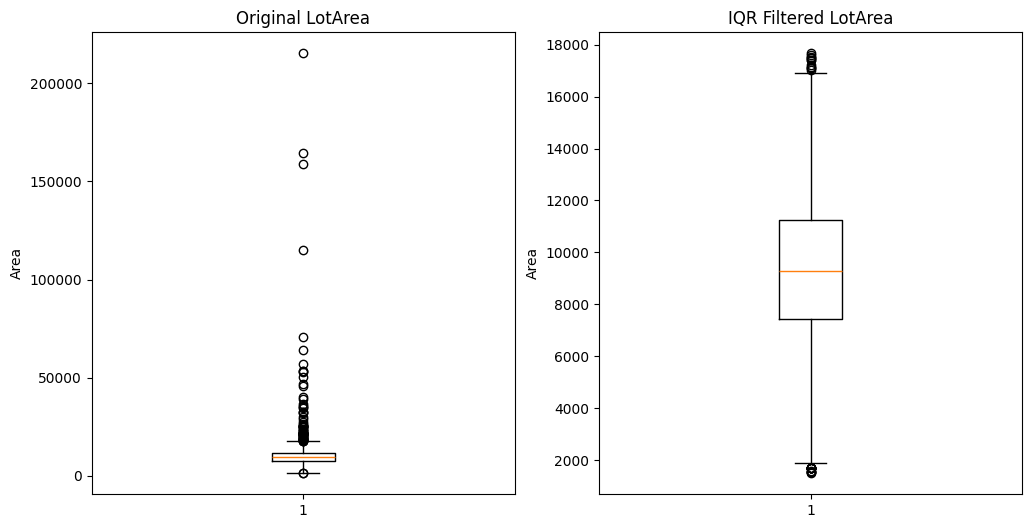

In [14]:
import matplotlib.pyplot as plt

outliers, filtered_df = outlier_detection_iqr(df, 'LotArea')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].boxplot(df['LotArea'])
axes[0].set_title('Original LotArea')
axes[0].set_ylabel('Area')

axes[1].boxplot(filtered_df['LotArea'])
axes[1].set_title('IQR Filtered LotArea')
axes[1].set_ylabel('Area')

plt.show()

###

### Report
For this exercise, I implemented the `outlier_detection_iqr` method, the IQR algorithm could significantly reduce the noise in the dataset.

Take the LotArea data from a house price dataset as an example, LotArea can be signficantly different from each other. Form the Original Area figure above, we can see that the axis of box plot has been stretched because of some outliers with extreme value like above 200000. By filtering those outliers, as figure IQR filtered LotArea shows, the box shows clearly and the data is spreading in a steady and stable way. This is important in data cleaning, it gives us the core data for a prediction task, so model won't be regularized or trained due to extreme value in data.

### Troubleshooting

I haven't met any trouble during implementation of IQR algorithmn.